# Nigeria Insurance Prediction

## 1. Problem Definition: 
 build a predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.

The model will be based on the building characteristics. The target variable, Claim, is a:

1 if the building has at least a claim over the insured period.

0 if the building doesn’t have a claim over the insured period.

## 2. Data Collection:
The data is from Zindi (Data Science Nigeria 2019 Challenge #1: Insurance Prediction)  
link: (https://zindi.africa/competitions/data-science-nigeria-2019-challenge-1-insurance-prediction)

## 3. Data Cleaning:
we will clean our data from missing values, outliers, physically impossible values or data entry errors or any other issues we can find.

## 4. Exploratory Data Analysis:
Carry out explatory analysis and visualizations to figure out important attributes and relations.

## 5. Data Preparation:
Getting our data ready for modeling by preprocessing it.

## 6. ML Modeling:
Selecting, training and evaluating machine learning models and predicting the values of the test data for the competition.


#Importing and Cleaning our Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

data = pd.read_csv("drive/MyDrive/Data Science Nigeria 2019 Challenge #1 Insurance Prediction/train_data.csv")
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [3]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [4]:
# check null values
data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

We have null values in 4 attributes : Graden, Building dimension, Date_of_Occupancy, Geo_Code. we will solve them one by one

first: Garden

I noticed a relation  between the garden and building fence, if the building doesn't have a fence, then it also doesn't have a garden.

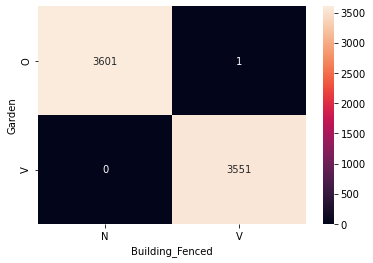

In [5]:
# showing fence-garden relation 
sns.heatmap(pd.crosstab(data["Garden"], data["Building_Fenced"]), annot=True, fmt="d");

In [6]:
# check our data where garden is null
data[data["Garden"].isnull()]

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
2382,H19098,2015,0.99726,1,V,N,NaN,R,8350.0,3,1985.0,3,33069,1
3664,H6581,2012,1.00000,0,V,N,NaN,R,3900.0,1,1976.0,5,61483,0
3665,H6582,2013,1.00000,0,V,N,NaN,R,3900.0,1,1976.0,5,61483,1
4577,H3915,2013,1.00000,0,V,N,NaN,R,760.0,1,1969.0,4,73015,0
4780,H1571,2013,1.00000,0,V,N,NaN,R,6203.0,1,1990.0,5,74173,0
4790,H5796,2012,1.00000,0,V,N,NaN,R,350.0,1,1960.0,3,74173,0
4791,H5797,2014,1.00000,0,V,N,NaN,R,350.0,1,1960.0,3,74173,0


as we see they are not fenced then they also don't have a garden

In [7]:
# filling missing Garden values
data["Garden"] = data["Garden"].fillna('O')

Second : Building Dimension

for building dimension we will use either average or median according to the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


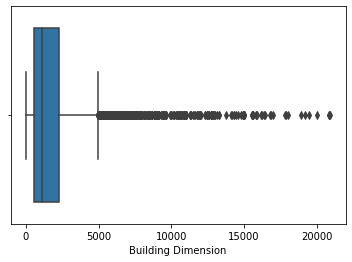

In [8]:
# boxplot for building dimension
sns.boxplot(data["Building Dimension"]);

In [9]:
data["Building Dimension"].describe()

count     7054.000000
mean      1883.727530
std       2278.157745
min          1.000000
25%        528.000000
50%       1083.000000
75%       2289.750000
max      20940.000000
Name: Building Dimension, dtype: float64

looks like our column distribution is heavy tailed we need to normalize it, we will do this in the feature engineering step, for now we will impute the missing values.

In [10]:
# filling missing values by the mean.
data["Building Dimension"].fillna(data["Building Dimension"].mean(), inplace = True)

Third: Date of occupancy and Geo_Code


In [11]:
# check all our date unique values
data["Date_of_Occupancy"].unique()

array([1960., 1850., 1800., 1980., 1988., 2013., 2011., 1550., 1900.,
       2007., 1970., 1950., 1700., 1976., 1940., 1920., 1982.,   nan,
       1972., 2010., 1971., 1995., 2006., 1999., 1969., 1985., 1965.,
       1981., 1975., 1997., 2003., 1990., 1930., 1973., 1991., 1974.,
       1978., 1967., 1927., 1952., 1957., 2009., 1977., 1890., 1949.,
       1951., 2008., 1987., 2000., 1962., 1956., 1993., 1912., 1983.,
       1954., 1968., 2004., 1936., 1958., 1966., 1953., 1979., 1946.,
       1955., 2001., 1870., 1961., 2015., 1613., 1964., 1984., 2014.,
       2002., 1986., 1992., 2005., 2012., 1910., 1945., 1864., 1942.,
       1939., 1934., 1998., 1908., 1948., 1860., 1926., 1938., 1895.,
       1545., 1959., 1989., 1996., 1963., 1840., 2016., 1718., 1600.,
       1875., 1898., 1880., 1915., 1994., 1810., 1937., 1907., 1931.,
       1925., 1935., 1824., 1914., 1750., 1846., 1903., 1905., 1906.,
       1830., 1923., 1924., 1928., 1947., 1911., 1901., 1902., 1904.,
       1919., 1896.,

In [12]:
# check Geo_Code unique values
data["Geo_Code"].unique()

array(['1053', '1143', '1160', ..., '2B096', '2B353', nan], dtype=object)

Here I prefere to fill missing values with 0 as I can't  decide the missing years or codes.

In [13]:
# fill missing values with 0
data["Date_of_Occupancy"].fillna(0, inplace = True)
data["Geo_Code"].fillna(0, inplace = True)

In [14]:
data.isna().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

Now, we don't have any null values in our data we can proceed with some EDA.


# Exploratory Data Analysis

In [15]:
# check our columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


we will see each attribute and compare it to the target to see the relation between them.

In [16]:
# function for plotting column chart
def bar_plot(data, col, title=None, display_pct=False, hue=None):
    ax = sns.countplot(data=data, x=col, order=data[col].value_counts().index, hue=hue)
    if title is None:
        plt.title('Distribution of ' + col)
    else:
        plt.title(title)
    plt.xlabel(col)
    if display_pct == True:
        labels = (data[col].value_counts())
        for i, v in enumerate(labels):
            ax.text(i, v + 10, str(v), horizontalalignment='center', size=14)
    plt.show()

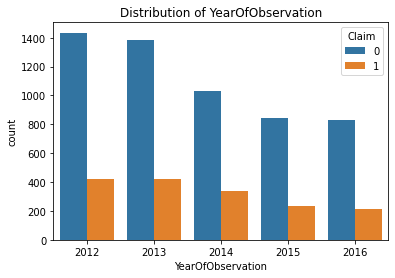

In [17]:
# year of observation 
bar_plot(data, 'YearOfObservation', hue='Claim')

from the plot it appears that over the years we have in our data the number of claims slightly decrease.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    7160.000000
mean        0.909758
std         0.239756
min         0.000000
25%         0.997268
50%         1.000000
75%         1.000000
max         1.000000
Name: Insured_Period, dtype: float64

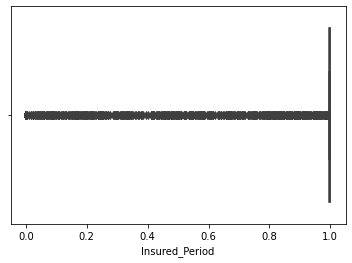

In [31]:
# boxplot for insured period
sns.boxplot(data["Insured_Period"])
data["Insured_Period"].describe()

it looks like our insured_period is also heavy tailed, we will need to normalize it

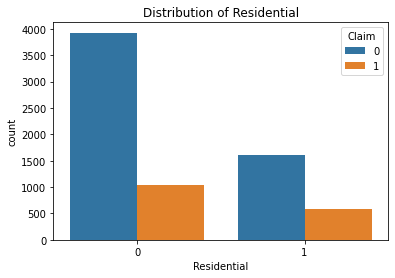

In [20]:
# relation between claims and if the building is residential
bar_plot(data, "Residential", hue="Claim")

it appears that residential area doesn't have a great effect on claims, but overall residential areas have less collapsed buildings.

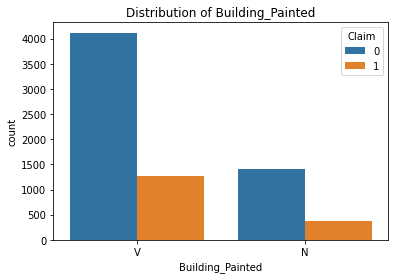

In [21]:
# building painted 
bar_plot(data, "Building_Painted", hue = "Claim")

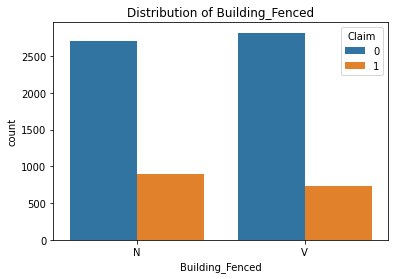

In [22]:
# building fenced
bar_plot(data, "Building_Fenced", hue = "Claim")

non fenced buildings appear to have slightly higher chance of claims than non-fenced.

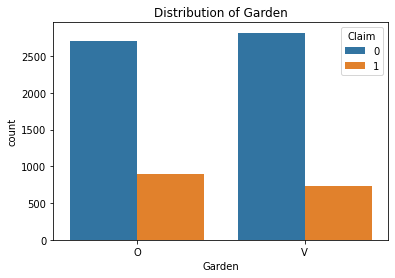

In [23]:
# garden
bar_plot(data, "Garden", hue = "Claim")

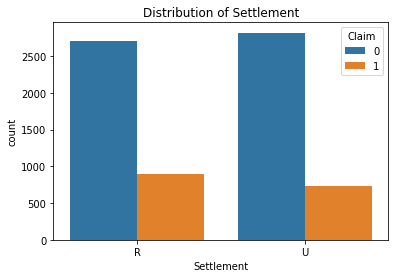

In [24]:
#Settlement 
bar_plot(data, "Settlement", hue = "Claim")

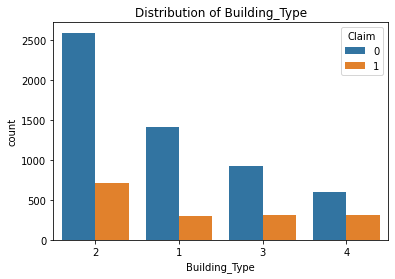

In [25]:
# Building Type
bar_plot(data, "Building_Type", hue = "Claim")

building type 2 is the most dominant in our data, type 1 looks to have the least claim ratio while 4 has the highest ratio.

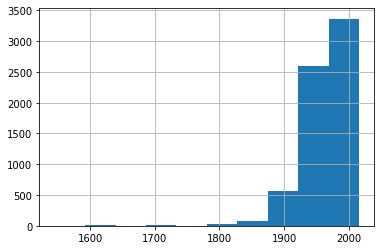

In [37]:
# date of occupancy
data[data['Date_of_Occupancy']!=0]['Date_of_Occupancy'].hist()

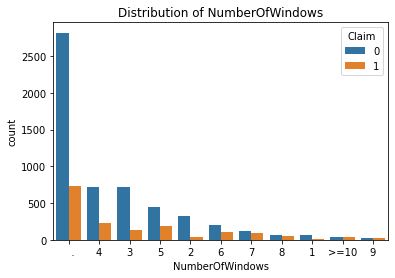

In [26]:
# Number of windows
bar_plot(data, "NumberOfWindows", hue = "Claim")

the most dominant is the '.' which I think is meant to be missing or unknown so I will fix it in the preprocessing part.

After doing some EDA we are now ready to proceed to the next step, Feature engineering and data preprocessing.



# Preparing Our Data (Feature Engineering)




We need to preprocess our data for modeling and apply some feature engineerig so we will do the following:

* our data is not balanced, we need to balance it. 
* Remove the ID column as it is unique.
* Change all binary object data types to 0,1
* Change number of windows data type to integer 
* Change categorical data from object data type to categorical data type 
* Normalize our data 


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [43]:
# first we will balance our data

from imblearn.over_sampling import SMOTE

c_0, c_1 = data['Claim'].value_counts()

class_0 = data[data['Claim'] == 0]
class_1 = data[data['Claim'] == 1]

train_class_1_over = class_1.sample(c_0, replace=True)
train_test_over = pd.concat([class_0, train_class_1_over], axis=0)
print(train_test_over.Claim.value_counts());

1    5526
0    5526
Name: Claim, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [44]:
# function for preprocessing our data
def preprocess(data):
  
  # drop id column
  data.drop(["Customer Id"], inplace=True,  axis=1)
  
  # converting binary objects to 0,1
  data[['Building_Painted', 'Building_Fenced']] = data[['Building_Painted', 'Building_Fenced']].replace(to_replace={"N":1, "V":0})
  data[['Garden']] = data[['Garden']].replace(to_replace={"V":1, "O":0})
  data[['Settlement']] = data[['Settlement']].replace(to_replace={"U":1, "R":0})

  # converting categorical objects to numbers
  data[['NumberOfWindows']] = data[['NumberOfWindows']].replace(to_replace={'   .':0, ">=10":10}).astype('int')

  # encoding geo_code
  from sklearn.preprocessing import LabelEncoder
  encoder = LabelEncoder()
  data["Geo_Code"] = data["Geo_Code"].astype("str")
  data["Geo_Code"] = encoder.fit_transform(data["Geo_Code"])

  # Normalizing our data
  from sklearn.preprocessing import MinMaxScaler
  # Building Dimension
  scaler_Building_Dimension = MinMaxScaler()
  data['Building Dimension'] = scaler_Building_Dimension.fit_transform(data['Building Dimension'].values.reshape(-1,1))
  # YearOfObservation
  scaler_YearOfObservation = MinMaxScaler()
  data['YearOfObservation'] = scaler_YearOfObservation.fit_transform(data.YearOfObservation.values.reshape(-1,1))
  # Date_of_Occupancy
  scaler_Date_of_Occupancy = MinMaxScaler()
  data['Date_of_Occupancy'] = scaler_Date_of_Occupancy.fit_transform(data.Date_of_Occupancy.values.reshape(-1,1))
  # Insured_Period
  scaler_Insured_Period = MinMaxScaler()
  data['Insured_Period'] = scaler_Insured_Period.fit_transform(data.Insured_Period.values.reshape(-1,1))

  return data


In [45]:
# preprocessing our data
preprocessed_data = preprocess(data)

In [46]:
# checking our data
preprocessed_data.info()
preprocessed_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   float64
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   int64  
 4   Building_Fenced     7160 non-null   int64  
 5   Garden              7160 non-null   int64  
 6   Settlement          7160 non-null   int64  
 7   Building Dimension  7160 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   7160 non-null   float64
 10  NumberOfWindows     7160 non-null   int64  
 11  Geo_Code            7160 non-null   int64  
 12  Claim               7160 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 727.3 KB


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,0.25,1.0,0,1,0,1,1,0.013802,1,0.972222,0,8,0
1,0.75,1.0,0,0,1,0,0,0.023354,1,0.917659,4,8,0
2,0.50,1.0,0,1,0,1,1,0.028368,1,0.972222,0,8,0
3,0.25,1.0,0,0,0,1,1,0.135584,1,0.972222,0,8,0
4,0.50,1.0,0,0,1,0,0,0.032428,1,0.892857,3,8,0


Now that our data is ready, we will proceed to the modeling section.

# Modeling

In this phase we will do the following :

* split our data
* Train and evaluate some chosen models.
*The evaluation metric for this competition is the Area Under the ROC curve (AUC).

In [ ]:
# install catboost
#!pip install catboost

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [75]:
# splitting our data
X = preprocessed_data.drop("Claim", axis=1)
y = preprocessed_data["Claim"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# dict to contain our models
models = {"KNN": KNeighborsClassifier(), 
          "RFC": RandomForestClassifier(),
          "LR": LogisticRegression(),
          "GBC":GradientBoostingClassifier(),
          "CBC": CatBoostClassifier()
          }


# function for training and evaluating given models
def train_and_evaluate(models, X_train, X_val, y_train, y_val):
  '''
  returns dataframe of each model and its scores 
  '''
  scores = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    scores[name] = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    
  print(scores)


In [83]:
# training and evaluating each model
train_and_evaluate(models, X_train, X_val, y_train, y_val);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Learning rate set to 0.020504
0:	learn: 0.6843593	total: 3.92ms	remaining: 3.92s
1:	learn: 0.6756744	total: 7.48ms	remaining: 3.73s
2:	learn: 0.6676548	total: 10.9ms	remaining: 3.64s
3:	learn: 0.6595833	total: 14.4ms	remaining: 3.58s
4:	learn: 0.6524517	total: 16.7ms	remaining: 3.32s
5:	learn: 0.6447720	total: 20.1ms	remaining: 3.33s
6:	learn: 0.6378323	total: 23.5ms	remaining: 3.34s
7:	learn: 0.6310994	total: 27ms	remaining: 3.35s
8:	learn: 0.6247271	total: 30.4ms	remaining: 3.34s
9:	learn: 0.6185918	total: 33.7ms	remaining: 3.34s
10:	learn: 0.6126492	total: 37.3ms	remaining: 3.35s
11:	learn: 0.6070519	total: 40.8ms	remaining: 3.36s
12:	learn: 0.6014858	total: 44.4ms	remaining: 3.37s
13:	learn: 0.5964017	total: 47.9ms	remaining: 3.38s
14:	learn: 0.5913081	total: 51.4ms	remaining: 3.38s
15:	learn: 0.5863828	total: 55.1ms	remaining: 3.39s
16:	learn: 0.5818881	total: 58.6ms	remaining: 3.39s
17:	learn: 0.5771913	total: 62.1ms	remaining: 3.39s
18:	learn: 0.5730673	total: 65.4ms	remaining: 

As we see Gardient boosting classifier and catboost classifier has the best scores.

# Predicting outputs from the test data

In [52]:
# importing test data
test_data = pd.read_csv("/content/drive/MyDrive/Data Science Nigeria 2019 Challenge #1 Insurance Prediction/test_data.csv")
test_data

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,2015,1.000000,0,V,V,V,U,NaN,4,1900.0,.,NaN
3065,H11720,2012,1.000000,0,V,V,V,U,NaN,2,1948.0,.,NaN
3066,H11721,2012,1.000000,0,V,V,V,U,NaN,2,1993.0,.,NaN
3067,H12408,2013,1.000000,0,V,V,V,U,NaN,1,1800.0,.,NaN


In [53]:
# Filling NaNs
test_data["Building Dimension"].fillna(test_data["Building Dimension"].mean(), inplace = True)
test_data["Date_of_Occupancy"].fillna(0, inplace = True)
test_data["Geo_Code"].fillna(0, inplace = True)
test_data["Garden"] = test_data["Garden"].fillna('O')

In [54]:
# preprocessing test data
df_test = test_data.copy()
test_data = preprocess(test_data)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   3069 non-null   float64
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   int64  
 3   Building_Painted    3069 non-null   int64  
 4   Building_Fenced     3069 non-null   int64  
 5   Garden              3069 non-null   int64  
 6   Settlement          3069 non-null   int64  
 7   Building Dimension  3069 non-null   float64
 8   Building_Type       3069 non-null   int64  
 9   Date_of_Occupancy   3069 non-null   float64
 10  NumberOfWindows     3069 non-null   int64  
 11  Geo_Code            3069 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 287.8 KB


In [84]:
# training final model on train data and predicting test data
final_model = CatBoostClassifier(eval_metric='AUC')
final_model.fit(X_train, y_train, eval_set =(X_val,y_val))
preds = final_model.predict_proba(test_data)[:, 1]
subs = pd.DataFrame()
subs["Customer Id"] = df_test["Customer Id"]
subs["Claim"] = preds
subs

Learning rate set to 0.047186
0:	test: 0.6590116	best: 0.6590116 (0)	total: 4.14ms	remaining: 4.14s
1:	test: 0.6865126	best: 0.6865126 (1)	total: 8.95ms	remaining: 4.47s
2:	test: 0.6819953	best: 0.6865126 (1)	total: 13.1ms	remaining: 4.35s
3:	test: 0.7054343	best: 0.7054343 (3)	total: 17.4ms	remaining: 4.33s
4:	test: 0.7044757	best: 0.7054343 (3)	total: 20.4ms	remaining: 4.06s
5:	test: 0.7003585	best: 0.7054343 (3)	total: 24.6ms	remaining: 4.08s
6:	test: 0.7111133	best: 0.7111133 (6)	total: 29.7ms	remaining: 4.21s
7:	test: 0.7099173	best: 0.7111133 (6)	total: 33.9ms	remaining: 4.21s
8:	test: 0.7159510	best: 0.7159510 (8)	total: 38.4ms	remaining: 4.23s
9:	test: 0.7170053	best: 0.7170053 (9)	total: 42.7ms	remaining: 4.22s
10:	test: 0.7178620	best: 0.7178620 (10)	total: 47.5ms	remaining: 4.27s
11:	test: 0.7193318	best: 0.7193318 (11)	total: 51.5ms	remaining: 4.24s
12:	test: 0.7181394	best: 0.7193318 (11)	total: 55.6ms	remaining: 4.22s
13:	test: 0.7210660	best: 0.7210660 (13)	total: 59.7ms

,Customer Id,Claim
0,H11920,0.151012
1,H11921,0.136044
2,H9805,0.099355
3,H7493,0.174868
4,H7494,0.167642
...,...,...
3064,H11583,0.253774
3065,H11720,0.216177
3066,H11721,0.203290
3067,H12408,0.209080


In [81]:
# exporting submit file
subs.to_csv("sub.csv", index= False)

On Zindi it scored 0.707 and placed in the top 30%